# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [3]:
# Add any additional import statements you need here
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/lenny/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data
artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

lyricsDict = {}
songtitleDict = defaultdict(list)
for artist in artist_folders : 
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]

    for f_name in artist_files : 
        with open("lyrics/" + artist + "/" + f_name) as infile : 
            lines = [line.strip() for line in infile]
            songtitleDict[artist].append(lines[0])
            lyricsDict[artist, lines[0]] = lines[1:]

In [6]:
# Read in the twitter data
base_path = "C://Users/lenny/twitter/"
twitter_files = os.listdir("twitter")
twitter_files = [f for f in twitter_files if f != ".DS_Store"]
twitter_files = [f for f in twitter_files if f != "Archive"]
artist_handles = list(set([name.split("_")[0] for name in twitter_files]))

descriptionDict = {}
for artist in artist_handles :
    follower_data_file = base_path + artist + "_followers_data.txt"
    df=pd.read_csv(follower_data_file, sep='\t')
    
    descriptionDict[artist] = df['Description']

In [7]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

positive_file = data_location + "positive-words.txt"
negative_file = data_location + "negative-words.txt"
sentiment_file = data_location + "tidytext_sentiments.txt"

positive_df = pd.read_csv(positive_file)
negative_df = pd.read_csv(negative_file)
sentiment_df = pd.read_csv(sentiment_file, sep='\t')

In [8]:
positive_df = positive_df.drop(['Unnamed: 0'], axis=1)
positive_df.head()

,words
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [9]:
negative_df = negative_df.drop(['Unnamed: 0'], axis=1)
negative_df.head()

,words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [10]:
sentiment_df.head()

,word,sentiment,lexicon
0,abandon,negative,nrc
1,abandoned,negative,nrc
2,abandonment,negative,nrc
3,abba,positive,nrc
4,abduction,negative,nrc


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [11]:
# your code here

pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in positive_df['words']:
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in negative_df['words']:
        word_dict[word] = neg_score
        
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

In [38]:
#song data

song_sentiment = defaultdict(dict)
for (artist, song_name), lyric in lyricsDict.items():
    song_text = str(lyricsDict[artist, song_name])
    score = bing_liu_score(song_text)
        
    song_sentiment[artist][song_name] = score

In [55]:
#calculate average sentiment per song
mtrench_total_score = 0
nwtb_total_score = 0

for (artist, song_name), lyrics in lyricsDict.items():
    if artist == 'marianas trench':
        mtrench_total_score += song_sentiment[artist][song_name]
    
    if artist == 'nate wants to battle':
        nwtb_total_score += song_sentiment[artist][song_name]

print("The average sentiment score for Marianas Trench is: ", mtrench_total_score / len(song_sentiment['marianas trench']))
print("The average sentiment score for Nate Wants to Battle is: ", nwtb_total_score / len(song_sentiment['nate wants to battle']))

The average score for Marianas Trench is:  -0.006236004926024909
The average score for Nate Wants to Battle is:  -0.0073633676795287805


In [64]:
#calculate max/min sentiments per artist
mt_list = []
nwtb_list = []

for (artist, song_name), lyrics in lyricsDict.items():
    if artist == 'marianas trench':
        mt_list.append([song_sentiment[artist][song_name], song_name])
    
    if artist == 'nate wants to battle':
        nwtb_list.append([song_sentiment[artist][song_name], song_name])

print("The max and min song sentiments for Marianas Trench are: ", max(mt_list), min(mt_list))
print("The max and min song sentiments for Nate Wants to Battle are: ", max(nwtb_list), min(nwtb_list))

The max and min song sentiments for Marianas Trench are:  [0.06213872832369942, 'Toy Soldiers'] [-0.06914893617021277, 'Fallout']
The max and min song sentiments for Nate Wants to Battle are:  [0.11917098445595854, 'My Shiny Teeth And Me'] [-0.1327683615819209, 'Spooky Scary Skeletons']


### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: <!-- Your answer here --> The higher sentiment score per song is Nate Wants to Battle.  But, it is a negligible difference.

---

Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: <!-- Your answer here --> Printed in the cell above

---

Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: <!-- Your answer here --> Printed in the cell above

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




In [72]:
#import seaborn as sns
mtrench_list = []
natewtbtl_list = []

for (artist, song_name), lyrics in lyricsDict.items():
    if artist == 'marianas trench':
        mtrench_list.append([song_sentiment[artist][song_name]])
    
    if artist == 'nate wants to battle':
        natewtbtl_list.append([song_sentiment[artist][song_name]])

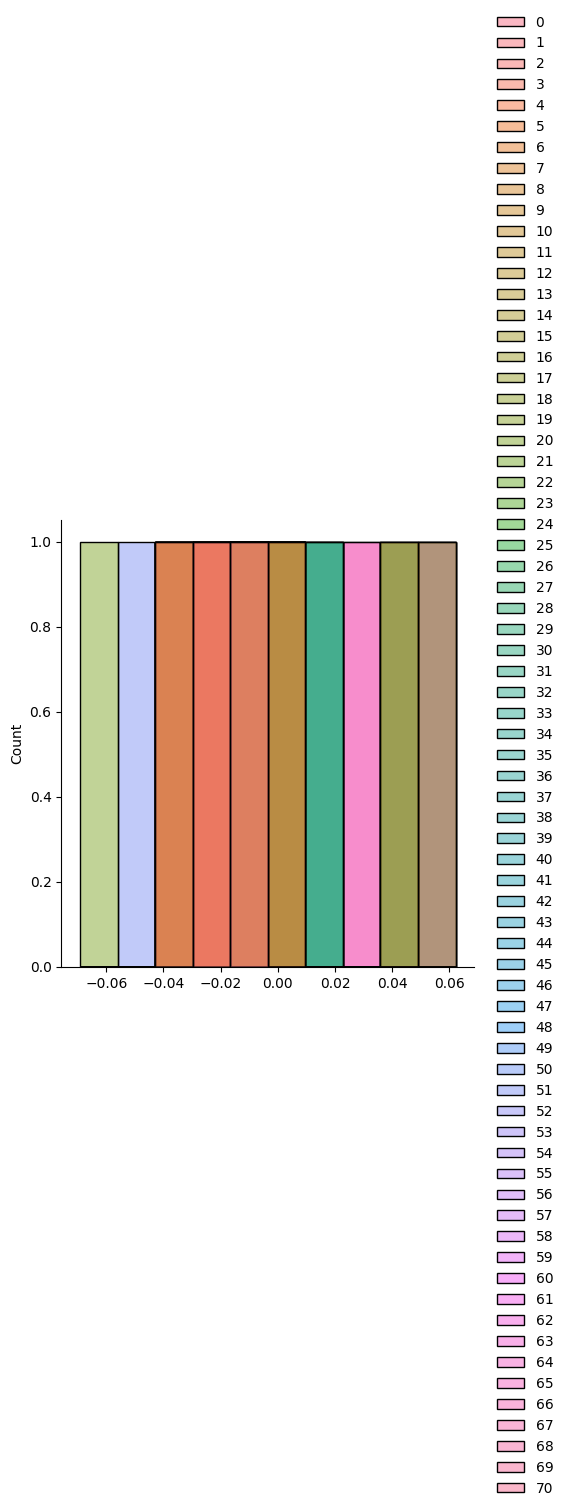

In [73]:
sns.displot(mtrench_list)

C:\Users\lenny\anaconda3\envs\my-env-for-ads509\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

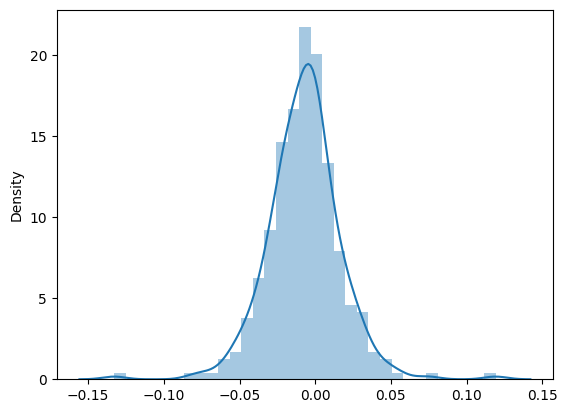

In [74]:
sns.distplot(natewtbtl_list)

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [77]:
#define all emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

In [15]:
# your code here

twitter_sentiment = defaultdict(list)
for artist in artist_handles:
    for i in range(len(descriptionDict[artist])):
        twitter_text = str(descriptionDict[artist][i])
        
        score = bing_liu_score(twitter_text)
        twitter_sentiment[artist].append(score)


In [20]:
print("The average sentiment for Marianas Trench is: ", sum(twitter_sentiment['mtrench']) / len(descriptionDict['mtrench']))
print("The average sentiment for Marianas Trench is: ", sum(twitter_sentiment['NateWantsToBtl']) / len(descriptionDict['NateWantsToBtl']))

The average sentiment for Marianas Trench is:  0.010544738600320023
The average sentiment for Marianas Trench is:  0.00535469818934702


Q: What is the average sentiment of your two artists? 

A: <!-- Your answer here --> The average sentiment for each of the artists is listed above.  Marianas Trench has the slight edge.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: <!-- Your answer here --> I wasn't able to implement the emoji part of this assignment.

